<a href="https://colab.research.google.com/github/lollcat/annealed_flow_transport/blob/mog_more/craft_gmm_more_settings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lollcat/annealed_flow_transport.git
!git checkout mog_more

Cloning into 'annealed_flow_transport'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 190 (delta 7), reused 9 (delta 4), pack-reused 174
Receiving objects: 100% (190/190), 72.33 MiB | 26.61 MiB/s, done.
Resolving deltas: 100% (103/103), done.
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
import os
os.chdir("annealed_flow_transport")

In [ ]:
!pip install ml_collections optax dm-haiku distrax -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.0/272.0 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 KB 9.0 MB/s eta 0:00:00


In [ ]:
from annealed_flow_transport.train import run_experiment
from evaluation import make_forward_pass_func, evaluate, load_checkpoint
import numpy as np
import numpy as np
import jax
import ml_collections
ConfigDict = ml_collections.ConfigDict

In [ ]:
from jax.config import config
config.update("jax_enable_x64", True)

In [ ]:
from configs.fab_mog import get_config

In [ ]:
exp_config = get_config()

### Run without pathological initialisation

In [ ]:
import matplotlib.pyplot as plt
import jax.numpy as jnp

In [ ]:
exp_config.initial_config.diagonal_cov  = 3600. # Big covariance to improve initialisation
exp_config.initial_sampler_config.diagonal_cov = 3600. # Big covariance to improve initialisation
exp_config.batch_size = 512 # Try increase batch size to improve performance.
exp_config.craft_batch_size = 512 # Try increase batch size to improve performance.
exp_config.craft_num_iters = int(10_000_000/128/10) # Long enough to see results. 
exp_config.optimization_config.craft_step_size = 1e-4 # Tried making this much lower (1e-5 but didn't fix things)

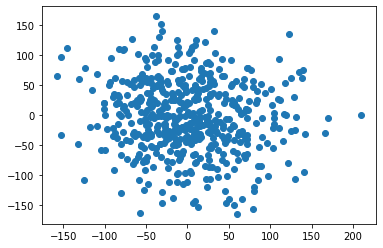

In [ ]:
base_samples = jax.random.normal(jax.random.PRNGKey(0), (exp_config.batch_size, 2)) * jnp.sqrt(exp_config.initial_sampler_config.diagonal_cov)
plt.plot(base_samples[:, 0], base_samples[:, 1], "o")

  0%|          | 0/78125 [00:00<?, ?it/s]

Step 0: Free energy 466.5331607565238 Log Normalizer estimate -0.31504325766494734


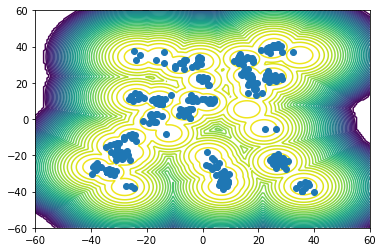

  1%|▏         | 992/78125 [00:08<10:36, 121.19it/s]

Step 1000: Free energy 305.9141681277614 Log Normalizer estimate -0.7686719863468277


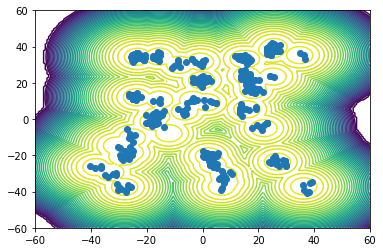

  3%|▎         | 1989/78125 [00:17<10:30, 120.83it/s]

Step 2000: Free energy 277.176402182872 Log Normalizer estimate -0.6288388345209381


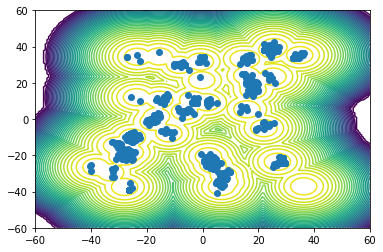

  4%|▍         | 3000/78125 [00:25<10:20, 121.00it/s]

Step 3000: Free energy 226.79568625666084 Log Normalizer estimate 0.08422936019872873


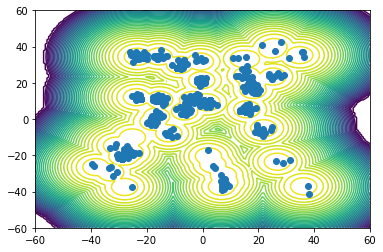

  5%|▌         | 3995/78125 [00:34<10:15, 120.46it/s]

Step 4000: Free energy 246.14524556608347 Log Normalizer estimate 0.41311025427276293


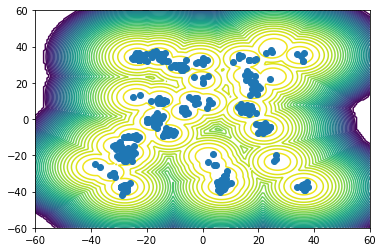

  6%|▋         | 4991/78125 [00:42<10:03, 121.12it/s]

Step 5000: Free energy 231.11608637956485 Log Normalizer estimate -0.08047464465520937


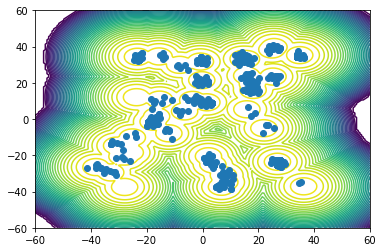

  8%|▊         | 5999/78125 [00:51<09:58, 120.42it/s]

Step 6000: Free energy 205.88439341797172 Log Normalizer estimate 0.013393742175425771


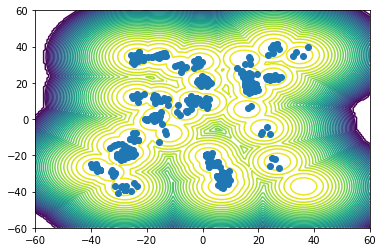

  9%|▉         | 6994/78125 [00:59<09:48, 120.79it/s]

Step 7000: Free energy 207.15989669046152 Log Normalizer estimate -1.0288901731346232


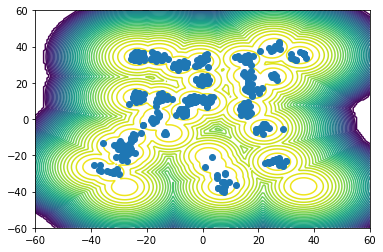

 10%|█         | 7997/78125 [01:08<09:41, 120.54it/s]

Step 8000: Free energy 180.61367482254795 Log Normalizer estimate 0.2577295176955534


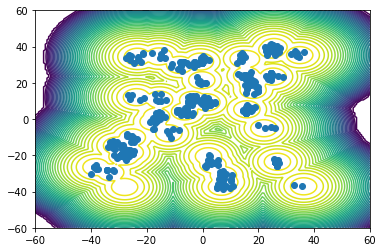

 12%|█▏        | 9000/78125 [01:17<09:34, 120.22it/s]

Step 9000: Free energy 152.34046419164648 Log Normalizer estimate 0.3938138873686876


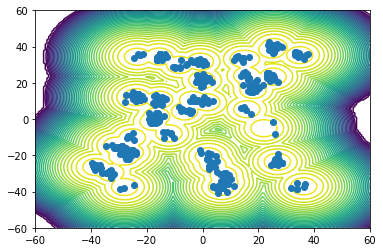

 13%|█▎        | 9992/78125 [01:25<09:25, 120.58it/s]

Step 10000: Free energy 166.59482177059232 Log Normalizer estimate -0.24690014796620385


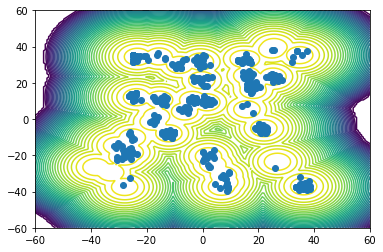

 14%|█▍        | 10995/78125 [01:34<09:22, 119.32it/s]

Step 11000: Free energy 116.03380549636476 Log Normalizer estimate 0.17481964012837548


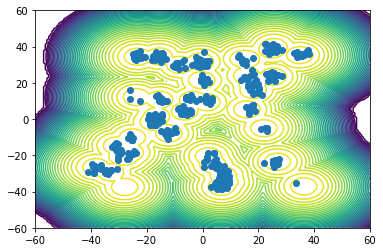

 15%|█▌        | 11991/78125 [01:42<09:07, 120.75it/s]

Step 12000: Free energy 118.5022440759356 Log Normalizer estimate 0.11083768612326894


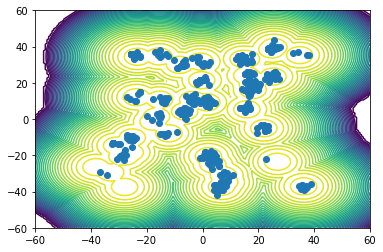

 17%|█▋        | 12999/78125 [01:51<09:06, 119.07it/s]

Step 13000: Free energy 98.18657599587827 Log Normalizer estimate -0.6796005173622808


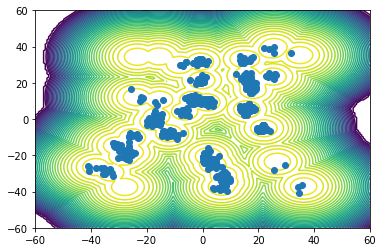

 18%|█▊        | 13995/78125 [02:00<08:59, 118.89it/s]

Step 14000: Free energy 121.29347566431278 Log Normalizer estimate -0.12783990292047198


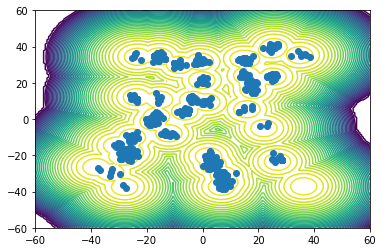

 19%|█▉        | 14997/78125 [02:08<08:48, 119.41it/s]

Step 15000: Free energy 68.2607253708512 Log Normalizer estimate -0.3525612865163419


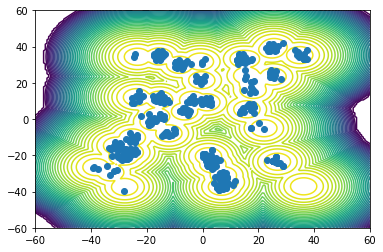

 20%|██        | 15998/78125 [02:17<08:40, 119.39it/s]

Step 16000: Free energy 67.54415089534612 Log Normalizer estimate -0.030424746399837055


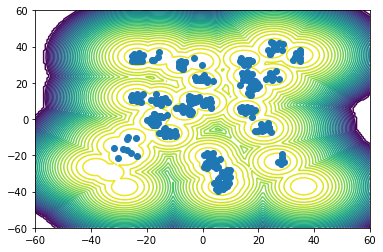

 22%|██▏       | 16998/78125 [02:26<11:33, 88.20it/s]

Step 17000: Free energy 71.26945776272929 Log Normalizer estimate 0.43773427890267946


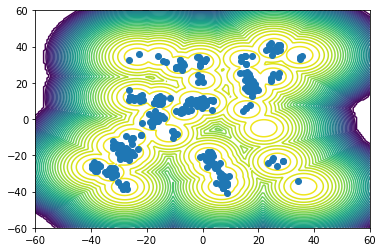

 23%|██▎       | 17989/78125 [02:37<11:52, 84.40it/s]

Step 18000: Free energy 56.003868488184395 Log Normalizer estimate -0.2794398071685005


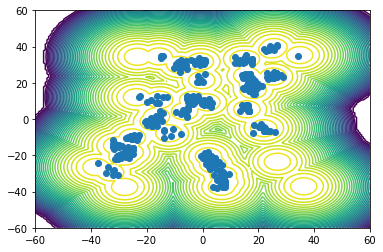

 24%|██▍       | 18999/78125 [02:46<08:15, 119.36it/s]

Step 19000: Free energy 56.80953081131305 Log Normalizer estimate -0.359685300708394


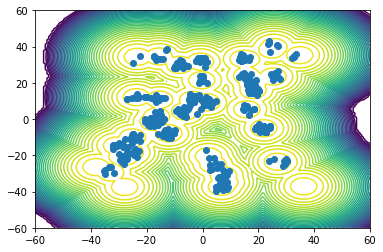

 26%|██▌       | 19999/78125 [02:54<08:05, 119.78it/s]

Step 20000: Free energy 43.033198187680256 Log Normalizer estimate -0.6095555821806613


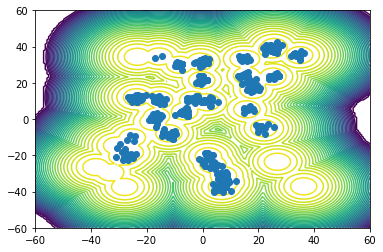

 27%|██▋       | 20995/78125 [03:03<08:02, 118.38it/s]

Step 21000: Free energy 40.35221451921543 Log Normalizer estimate -0.23935976231349976


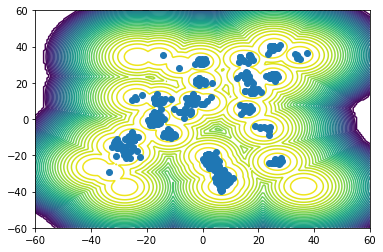

 28%|██▊       | 21998/78125 [03:12<07:58, 117.25it/s]

Step 22000: Free energy 31.178149456165468 Log Normalizer estimate -0.34958298429328316


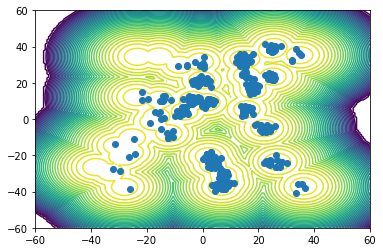

 29%|██▉       | 22991/78125 [03:21<07:50, 117.27it/s]

Step 23000: Free energy 33.44833231388244 Log Normalizer estimate -0.04402249467921182


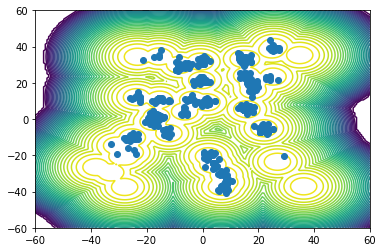

 31%|███       | 23996/78125 [03:30<08:28, 106.54it/s]

Step 24000: Free energy 23.650042510683296 Log Normalizer estimate -0.8886246043648218


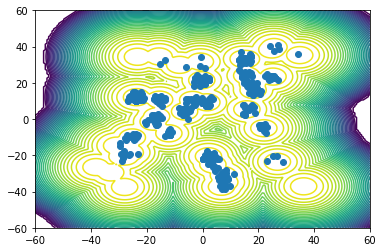

 32%|███▏      | 24998/78125 [03:39<08:31, 103.82it/s]

Step 25000: Free energy 28.450448118992348 Log Normalizer estimate -0.6467152667049683


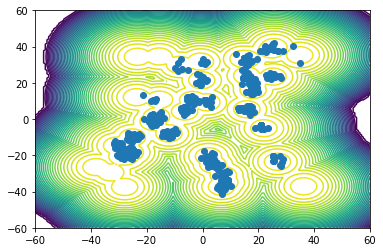

 33%|███▎      | 25994/78125 [03:48<07:21, 117.97it/s]

Step 26000: Free energy 19.942023621780066 Log Normalizer estimate -0.42333816107872835


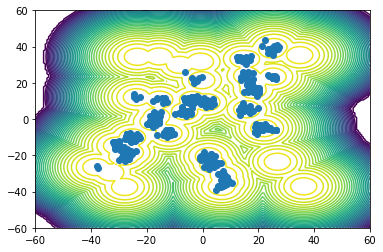

 34%|███▎      | 26316/78125 [03:51<07:35, 113.72it/s]


KeyboardInterrupt: ignored

In [ ]:
results = run_experiment(exp_config)

## Include some HMC transitions

In [ ]:
hmc_step_config = ConfigDict()
hmc_step_config.step_times = [0., 0.25, 0.5, 1.]
hmc_step_config.step_sizes = [0.15, 0.1, 0.1, 0.05]
exp_config.mcmc_config.hmc_step_config = hmc_step_config
exp_config.mcmc_config.use_jax_hmc = True

exp_config.mcmc_config.hmc_steps_per_iter = 2
exp_config.mcmc_config.hmc_num_leapfrog_steps = 10

exp_config.craft_num_iters = int(10_000_000/128/20) # Long enough to see results. 

In [ ]:
exp_config.mcmc_config

hmc_num_leapfrog_steps: 10
hmc_step_config:
  step_sizes:
  - 0.15
  - 0.1
  - 0.1
  - 0.05
  step_times:
  - 0.0
  - 0.25
  - 0.5
  - 1.0
hmc_steps_per_iter: 2
nuts_steps_per_iter: 0
rwm_step_config:
  step_sizes:
  - 10.0
  - 10.0
  step_times:
  - 0.0
  - 1.0
rwm_steps_per_iter: 1
slice_steps_per_iter: 0
use_jax_hmc: true

  0%|          | 0/3906 [00:00<?, ?it/s]

Step 0: Free energy 466.4350750884379 Log Normalizer estimate -0.18926651283134976


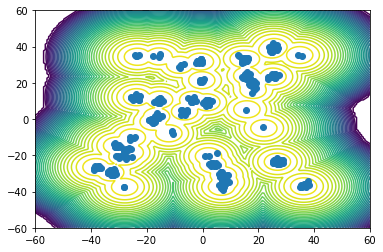

 26%|██▌       | 997/3906 [00:30<01:28, 33.01it/s]

Step 1000: Free energy 234.2873727988662 Log Normalizer estimate -0.2915225783260107


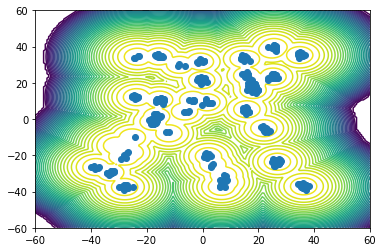

 51%|█████     | 2000/3906 [01:02<00:57, 33.03it/s]

Step 2000: Free energy 134.30672115521682 Log Normalizer estimate -0.456749331798882


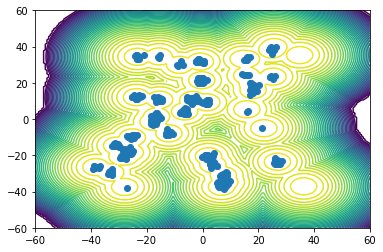

 77%|███████▋  | 3000/3906 [01:32<00:27, 33.08it/s]

Step 3000: Free energy 72.63425180721443 Log Normalizer estimate 0.7057456620709299


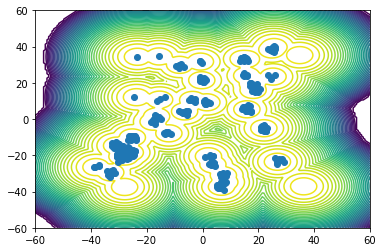

100%|██████████| 3906/3906 [02:00<00:00, 32.39it/s]


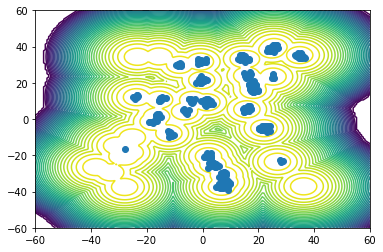

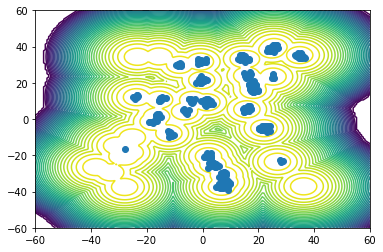

In [ ]:
results = run_experiment(exp_config)

# Increase metropolis step size, more steps

In [ ]:
exp_config.mcmc_config.rwm_step_config.step_sizes = [10.0, 10.0]  # constant step size
exp_config.mcmc_config.rwm_steps_per_iter = 2

In [ ]:
exp_config.mcmc_config

hmc_num_leapfrog_steps: 10
hmc_step_config:
  step_sizes:
  - 0.15
  - 0.1
  - 0.1
  - 0.05
  step_times:
  - 0.0
  - 0.25
  - 0.5
  - 1.0
hmc_steps_per_iter: 2
nuts_steps_per_iter: 0
rwm_step_config:
  step_sizes:
  - 10.0
  - 10.0
  step_times:
  - 0.0
  - 1.0
rwm_steps_per_iter: 2
slice_steps_per_iter: 0
use_jax_hmc: true

  0%|          | 0/3906 [00:00<?, ?it/s]

Step 0: Free energy 466.4421400887966 Log Normalizer estimate -0.2090999646310605


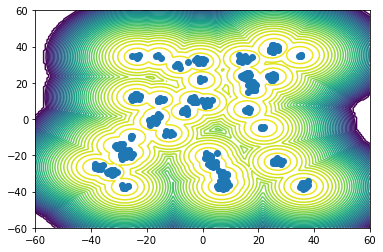

 26%|██▌       | 999/3906 [00:32<01:33, 31.04it/s]

Step 1000: Free energy 234.30171195980034 Log Normalizer estimate -0.29280893270788777


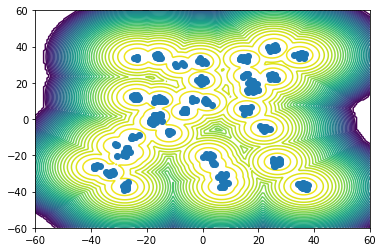

 51%|█████     | 1999/3906 [01:04<01:01, 31.19it/s]

Step 2000: Free energy 134.30872766611435 Log Normalizer estimate -0.46385414575885875


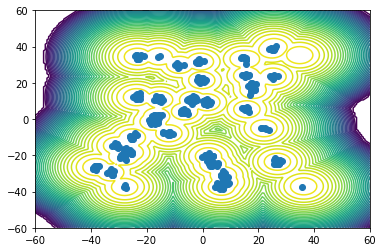

 77%|███████▋  | 2999/3906 [01:37<00:29, 31.17it/s]

Step 3000: Free energy 72.71406671145486 Log Normalizer estimate 0.6559024587330686


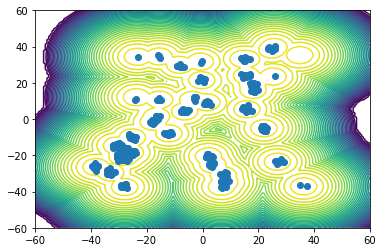

100%|██████████| 3906/3906 [02:06<00:00, 30.82it/s]


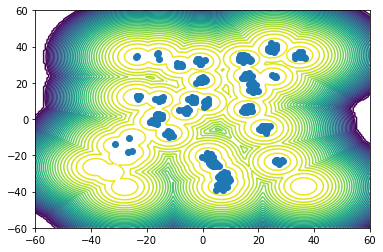

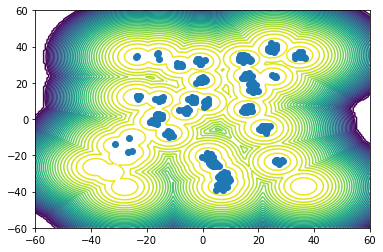

In [ ]:
results = run_experiment(exp_config)